*VIEW [THIS NOTEBOOK ON NBVIEWER](https://nbviewer.org/github/scheinmensch/Spotify/blob/main/AllThemWitches.ipynb?flush_cache=False) TO SEE AND TRY INTERACTIVE ELEMENTS*

_________________________________

## A rocky data analysis about music of the band:
# <span style="font-family:'Boucherie Block';">ALL THEM WITCHES</span>

<span style="font-family:'Boucherie Block';">ALL THEM WITCHES</span> is an American rock band from Nashville, Tennessee. They formed in 2012. The band's musical style incorporates elements from multiple genres, such as hard rock, stoner rock, psychedelia, neo-psychedelia, blues, folk, and southern rock.

*source: [Wikipedia](https://en.wikipedia.org/wiki/All_Them_Witches)*

**[Listen to All Them Witches while you read through this notebook](https://open.spotify.com/intl-de/track/0uXydSmVXTOZ3Mx2z24BNi)**

In [1]:
# import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from matplotlib import font_manager
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import warnings

In [2]:
# get the fonts Boucherie Block and Rockabilly
font_path = '/Users/johannakruger/Library/Fonts/Boucherie Block.otf'
prop = font_manager.FontProperties(fname=font_path)

font_path2 = '/Users/johannakruger/Library/Fonts/ROCKABILLY Regular.otf'
prop2 = font_manager.FontProperties(fname=font_path2)

In [3]:
# more settings
sns.set()

cpal= ["#edae49","#df7c52","#d1495b","#696174","#00798c","#318F63","#003d5b"]

cpal_px= {'Nothing as the Ideal': '#edae49', 'ATW': '#df7c52', 'Sleeping Through The War': '#d1495b', 'Dying Surfer Meets His Maker': '#696174', 'Lightning At The Door': '#00798c', 'Our Mother Electricity' : '#318F63', "Baker's Dozen" : '#003d5b'}

pio.renderers.default = "jupyterlab+notebook_connected+svg"

In [4]:
# read df
atw = pd.read_csv('data/AllThemWitches.csv')

In [5]:
# reorder and select columns
atw = atw[['id', 'name', 'album_name', 'album_release_date', 'duration_ms', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'time_signature', 'valence', 'explicit']].copy()

In [6]:
# show columns
atw.columns

Index(['id', 'name', 'album_name', 'album_release_date', 'duration_ms',
       'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo',
       'time_signature', 'valence', 'explicit'],
      dtype='object')

In [7]:
# have a look at the dataframe's first 5 rows
atw.head(5)

,id,name,album_name,album_release_date,duration_ms,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,valence,explicit
0,29JJH9fvsUPRObLXsK6G1H,Blood And Sand / Milk And Endless Waters - Live,Live On The Internet,2022-03-18,583278,24,0.277,0.675,2,-8.831,1,0.0446,0.001780,0.603,0.1510,150.341,4,0.0392,False
1,0cMsXAtOu1x9Ckoac6FIF8,Dirt Preachers - Live,Live On The Internet,2022-03-18,244609,22,0.285,0.567,5,-8.211,1,0.0307,0.001730,0.126,0.1750,138.786,3,0.1320,False
2,3LuWevrwAj9ei0Y6DgwP5a,Saturnine & Iron Jaw - Live,Live On The Internet,2022-03-18,300513,22,0.441,0.795,7,-8.601,0,0.0407,0.004640,0.601,0.1240,141.519,4,0.1720,False
3,7cSAoErMPkB1gpfs8JBH19,41 - Live,Live On The Internet,2022-03-18,332148,22,0.418,0.590,0,-8.548,0,0.0316,0.012600,0.663,0.1090,123.749,4,0.2860,False
4,1jZ4ddGpd67sZe9tktngZ5,When God Comes Back - Live,Live On The Internet,2022-03-18,221170,21,0.254,0.702,5,-7.531,1,0.0417,0.000408,0.107,0.0838,160.414,4,0.3960,False


### What do all these audio features mean?

Let's have a look at the [Spotify Web API documentation](https://developer.spotify.com/documentation/web-api/reference/get-audio-features)

**popularity**
The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are.
Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past.

**duration_ms**
The duration of the track in milliseconds.

**acousticness**
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**danceability**
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

**energy**
Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

**instrumentalness**
Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

**key**
The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.

**liveness**
Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

**loudness**
The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.

**mode**
Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

**speechiness**
Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.

**tempo**
The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

**time_signature**
An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".

**valence**
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**explicit**
Whether or not the track has explicit lyrics ( true = yes it does; false = no it does not OR unknown).

In [8]:
# shape
atw.shape

(103, 19)

There are 103 tracks and 19 features.

In [9]:
# have a look at dtypes, number of non-null values per column
atw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  103 non-null    object 
 1   name                103 non-null    object 
 2   album_name          103 non-null    object 
 3   album_release_date  103 non-null    object 
 4   duration_ms         103 non-null    int64  
 5   popularity          103 non-null    int64  
 6   danceability        103 non-null    float64
 7   energy              103 non-null    float64
 8   key                 103 non-null    int64  
 9   loudness            103 non-null    float64
 10  mode                103 non-null    int64  
 11  speechiness         103 non-null    float64
 12  acousticness        103 non-null    float64
 13  instrumentalness    103 non-null    float64
 14  liveness            103 non-null    float64
 15  tempo               103 non-null    float64
 16  time_sig

There are no missing values. We have data of various types, most are discrete or continuous numbers.

How many tracks are on each album?

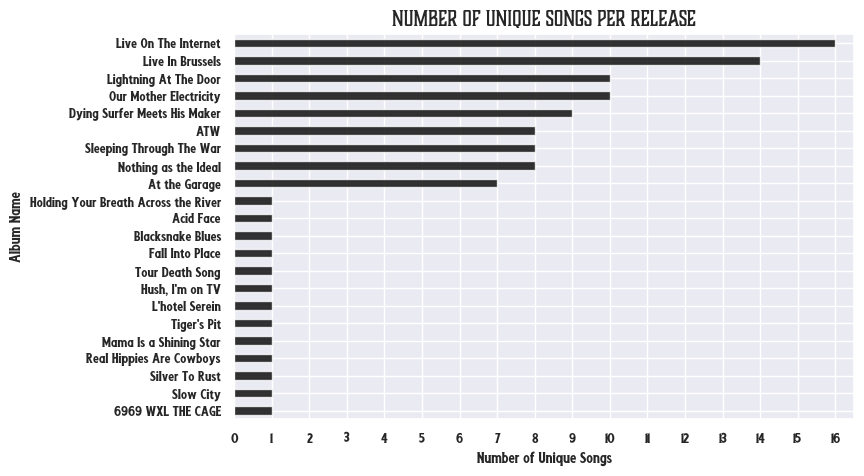

In [10]:
unique_songs_per_album = atw.groupby('album_name')['id'].nunique().sort_values(ascending=True)
plt.figure(figsize=(8,5))
unique_songs_per_album.plot(kind='barh', color='000000', alpha=0.8)
plt.xlabel('Number of Unique Songs', fontproperties=prop2, fontsize=14)
plt.ylabel('Album Name', fontproperties=prop2, fontsize=14)
plt.title('Number of Unique Songs per Release', fontproperties=prop, fontsize=15)
plt.xticks(np.arange(0,17,1),fontproperties=prop2, fontsize=13)
plt.xlim(0,16.5)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.show()

There are a couple of releases with only one track. 

I'll remove all songs from the live albums for this analysis:

In [11]:
atw = atw[~atw['album_name'].isin(['Live On The Internet', 'Live In Brussels', 'At the Garage'])].copy()

Let's check the most and least popular songs of All Them Witches on Spotify:

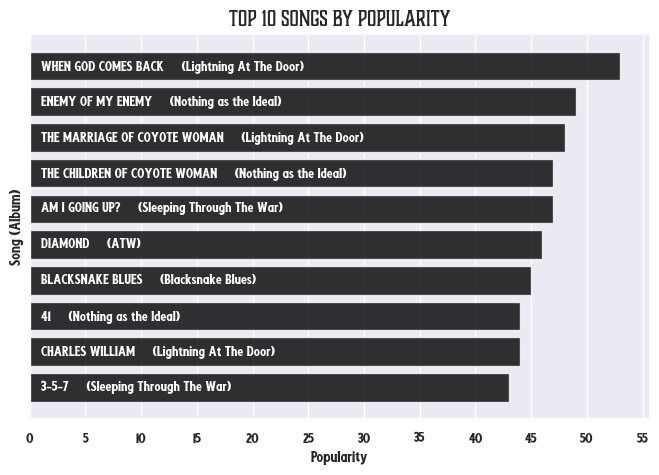

In [12]:
top_10_songs = atw.nlargest(10, 'popularity')[['name', 'album_name', 'popularity']].reset_index(drop=True)
top_10_songs['name'] = top_10_songs['name'].str.upper()
plt.figure(figsize=(8,5))  # 
bars = plt.barh(range(len(top_10_songs)), top_10_songs['popularity'], color='000000', alpha=0.8)

for i, bar in enumerate(bars):
    plt.text(1, bar.get_y() + bar.get_height()/2, 
             top_10_songs['name'].iloc[i] + '     (' + top_10_songs['album_name'].iloc[i] + ')', 
             va='center', ha='left', color='#FFFFFF', fontproperties=prop2, fontsize=13)

plt.xlabel('Popularity', fontproperties=prop2, fontsize=14)
plt.ylabel('Song (Album)', fontproperties=prop2, fontsize=14)
plt.title('Top 10 Songs by Popularity', fontproperties=prop, fontsize=15)
plt.yticks([])
plt.xticks(np.arange(0,60,5),fontproperties=prop2, fontsize=13)
plt.gca().invert_yaxis()  
plt.show()

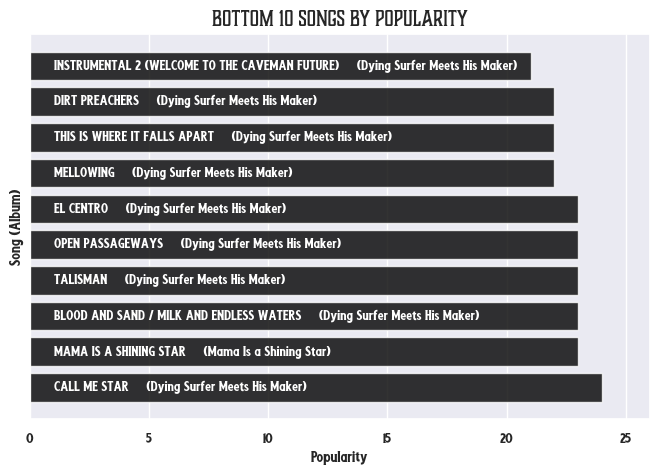

In [13]:
bottom_10_songs = atw.nsmallest(10, 'popularity')[['name', 'album_name', 'popularity']].reset_index(drop=True)
bottom_10_songs['name'] = bottom_10_songs['name'].str.upper()
plt.figure(figsize=(8,5))  # 
bars = plt.barh(range(len(bottom_10_songs)), bottom_10_songs['popularity'], color='000000', alpha=0.8)

for i, bar in enumerate(bars):
    plt.text(1, bar.get_y() + bar.get_height()/2, 
             bottom_10_songs['name'].iloc[i] + '     (' + bottom_10_songs['album_name'].iloc[i] + ')', 
             va='center', ha='left', color='#FFFFFF', fontproperties=prop2, fontsize=13)

plt.xlabel('Popularity', fontproperties=prop2, fontsize=14)
plt.ylabel('Song (Album)', fontproperties=prop2, fontsize=14)
plt.title('Bottom 10 Songs by Popularity', fontproperties=prop, fontsize=15)
plt.yticks([])
plt.xticks(np.arange(0,35,5),fontproperties=prop2, fontsize=13)
plt.xlim(0,26)
plt.gca().invert_yaxis()  
plt.show()

The entire album "Dying Surfer Meets His Maker" is very unpopular. That's strange. (I like it and don't think it's any worse than the other albums. This must have other reasons.)

Let's have a quick look at the number of (studio) tracks released each year.

In [14]:
atw['album_release_date'] = pd.to_datetime(atw['album_release_date'])
counts = atw.groupby(atw['album_release_date'].dt.to_period('Y'))['id'].count()

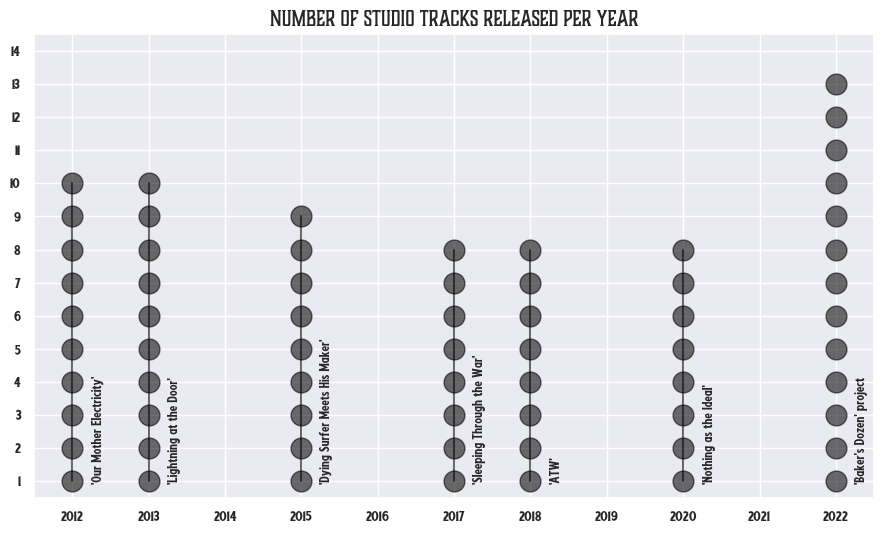

In [15]:
plt.figure(figsize=(9, 5.5))
for date, count in counts.items():
    y_values = list(range(1, count + 1))
    plt.plot([date.to_timestamp()] * count, y_values, marker='o', color='#00000090', markersize=15, linestyle='None')
    if date.year  in [2012, 2013, 2015, 2017, 2018, 2020]:
        plt.plot([date.to_timestamp(), date.to_timestamp()], [1, count], color='#00000090', linestyle='-')

plt.xlabel('')
plt.ylabel('')
plt.title('Number of studio tracks released per year', fontproperties=prop, fontsize=15)
plt.gca().xaxis.set_major_locator(YearLocator())
plt.text(pd.Timestamp('2012-04-01'), 1, "'Our Mother Electricity'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2013-04-01'), 1, "'Lightning at the Door'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2015-04-01'), 1, "'Dying Surfer Meets His Maker'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2017-04-01'), 1, "'Sleeping Through the War'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2018-04-01'), 1, "'ATW'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2020-04-01'), 1, "'Nothing as the Ideal'", fontsize=12, rotation=90, fontproperties=prop2)
plt.text(pd.Timestamp('2022-04-01'), 1, "'Baker's Dozen' project", fontsize=12, rotation=90, fontproperties=prop2)
plt.yticks(range(1, 15), fontproperties=prop2, fontsize=13)
plt.ylim(0.5, 14.5)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.tight_layout()
plt.show()

There were thirteen individual singles released in twelve months throughout 2022. It is called the "Baker's Dozen" project.

I want to have a close look at the distributions of the variables before we explore the relationships.

Let's have a look at the 

### Popularity of each album

I'll treat the "Baker's Dozen" project as one album.

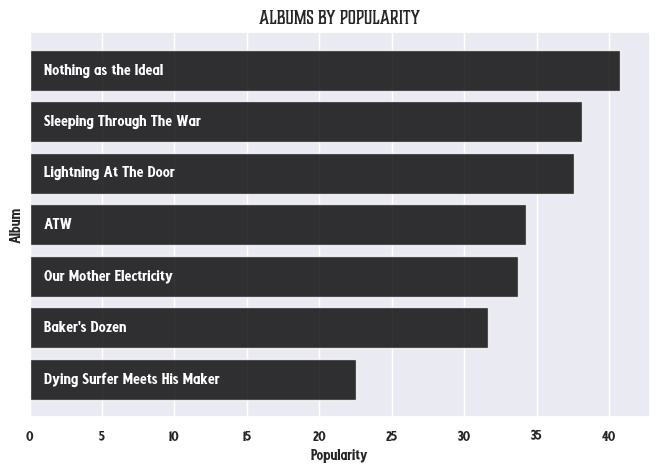

In [16]:
atw.loc[atw['album_release_date'].dt.year == 2022, 'album_name'] = "Baker's Dozen"
album_popularity = atw.groupby('album_name')['popularity'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,5))
bars = plt.barh(range(len(album_popularity)), album_popularity['popularity'], color='000000', alpha=0.8)

for i, bar in enumerate(bars):
    plt.text(1, bar.get_y() + bar.get_height()/2, 
             album_popularity['album_name'].iloc[i], 
             va='center', ha='left', color='#FFFFFF', fontproperties=prop2, fontsize=15)

plt.xlabel('Popularity', fontproperties=prop2, fontsize=14)
plt.ylabel('Album', fontproperties=prop2, fontsize=14)
plt.title('Albums by Popularity', fontproperties=prop, fontsize=13)
plt.yticks([])
plt.xticks(fontproperties=prop2, fontsize=13)
plt.gca().invert_yaxis()  
plt.show()

Of course, "Dying Surfer Meets His Maker" is in last place. "Nothing as the Ideal" is the newest album, I can imagine that this also plays a role for the popularity. I'll check that later when I explore relationships between the variables.

Let's now check the

### Duration

The duration of each track is given in milliseconds, but I'll convert it to minutes.

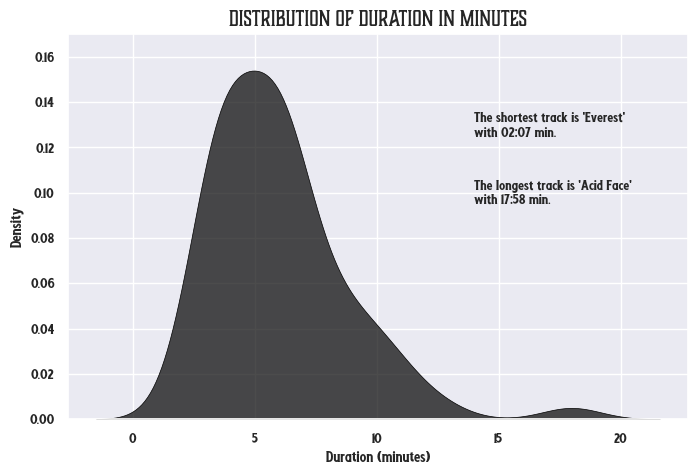

In [17]:
def convert_to_mmss(duration_minutes):
    minutes = int(duration_minutes)
    seconds = int((duration_minutes - minutes) * 60)
    return f"{minutes:02d}:{seconds:02d}"

atw['duration_minutes'] = atw['duration_ms'] / (1000 * 60)
plt.figure(figsize=(8,5))
sns.kdeplot(data=atw['duration_minutes'], fill=True, color= '#000000', alpha=0.7,edgecolor='#000000', linewidth=0.5)
plt.xlabel('Duration (minutes)', fontproperties=prop2, fontsize=14)
plt.ylabel('Density', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Duration in minutes', fontproperties=prop, fontsize=15)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.ylim(0,0.17)
plt.text(14, 0.125,f"The shortest track is '{atw.loc[atw['duration_ms'].idxmin(), 'name']}' \nwith {convert_to_mmss(atw['duration_minutes'].min())} min.", fontsize=13, fontproperties=prop2)
plt.text(14, 0.095,f"The longest track is '{atw.loc[atw['duration_ms'].idxmax(), 'name']}' \nwith {convert_to_mmss(atw['duration_minutes'].max())} min.", fontsize=13, fontproperties=prop2)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.show();

Most tracks are about 5 minutes long, but as an honorable rock band there are of course some really long tracks as well.

### Popularity

Lets have a look at the popularity again. (The popularity of a track is a value between 0 and 100, with 100 being the most popular.)

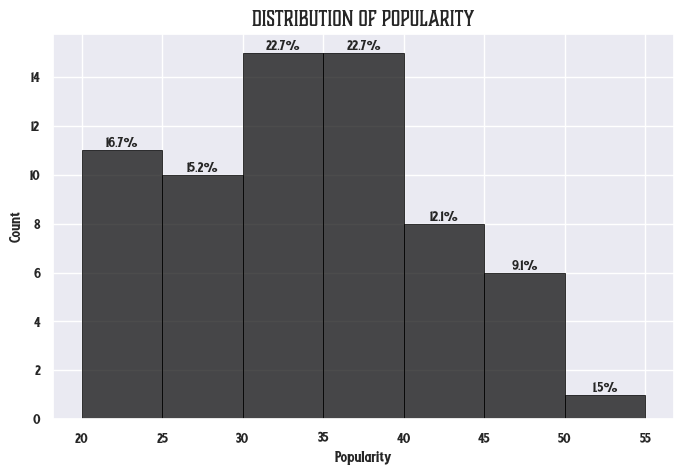

In [18]:
bin_boundaries = np.arange(20,60,5)
plt.figure(figsize=(8,5))
sns.histplot(atw['popularity'], color='#000000', edgecolor='#000000', alpha=.7,linewidth=0.5, bins=bin_boundaries, stat='count')
plt.xlabel('Popularity', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Popularity', fontproperties=prop, fontsize=15)
plt.xticks(np.arange(20, 60, 5),fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
counts, _ = np.histogram(atw['popularity'], bins=bin_boundaries)
total_count = len(atw['popularity'])
percentages = [(count / total_count) * 100 for count in counts]

for i, count in enumerate(counts):
    plt.text(bin_boundaries[i] + (bin_boundaries[i + 1] - bin_boundaries[i]) / 2, count, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=13,fontproperties=prop2)

plt.show();

I don't have a comparison just yet, but I assume that these are rather weak popularity ratings.

### Danceability

How suitable are the tracks for dancing? A value of 0.0 is least danceable and 1.0 is most danceable. I perceive the band's music less as "danceable" music. (Of course, you can probably always move somehow).

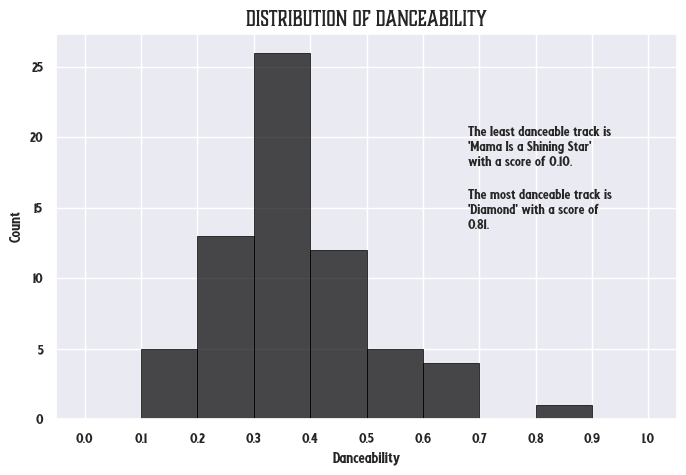

In [19]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['danceability'], color='#000000', alpha=.7, edgecolor='#000000', linewidth=0.5, bins=bin_boundaries, stat='count')
plt.xlabel('Danceability', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Danceability', fontproperties=prop, fontsize=15)
plt.yticks(np.arange(0, 30, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=13)
plt.text(0.68, 18,f"The least danceable track is \n'{atw.loc[atw['danceability'].idxmin(), 'name']}' \nwith a score of {atw['danceability'].min():.2f}.",fontproperties=prop2, fontsize=13)
plt.text(0.68, 13.5,f"The most danceable track is \n'{atw.loc[atw['danceability'].idxmax(), 'name']}' with a score of \n{atw['danceability'].max():.2f}.", fontproperties=prop2, fontsize=13)
plt.show();

The values are higher than expected. I'm honestly surprised that the track "Diamond" has such a high danceability score. I perceive this song rather quiet and slow but my perception relates more to the singing. The rhythm is quite stable and the tap tempo is quite high. In the documentation they say that the danceability score is based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity so this may explain the high score. The song "Mama Is a Shining Star" is indeed little danceable, sounds very spheric. 

We'll probably find out more about this score when we look into the relationships.

Let's have a look at

### Energy

Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

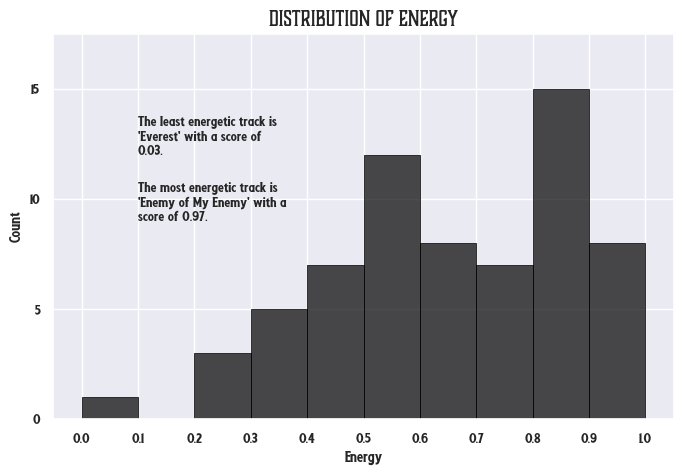

In [20]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['energy'],  color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Energy', fontproperties=prop, fontsize=15)
plt.xlabel('Energy', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 20, 5), fontproperties=prop2, fontsize=13) 
plt.ylim(0,17.5)
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.text(0.1, 12,f"The least energetic track is \n'{atw.loc[atw['energy'].idxmin(), 'name']}' with a score of \n{atw['energy'].min():.2f}.", fontproperties=prop2, fontsize=13)
plt.text(0.1, 9,f"The most energetic track is \n'{atw.loc[atw['energy'].idxmax(), 'name']}' with a \nscore of {atw['energy'].max():.2f}.", fontproperties=prop2, fontsize=13)
plt.show();

There is a very wide range, but most songs are rather energetic. I agree that "Everest" isn't and "Enemy of My Enemy" is an energetic track.

### Loudness

This variable describes the overall loudness of a track in decibels (dB)

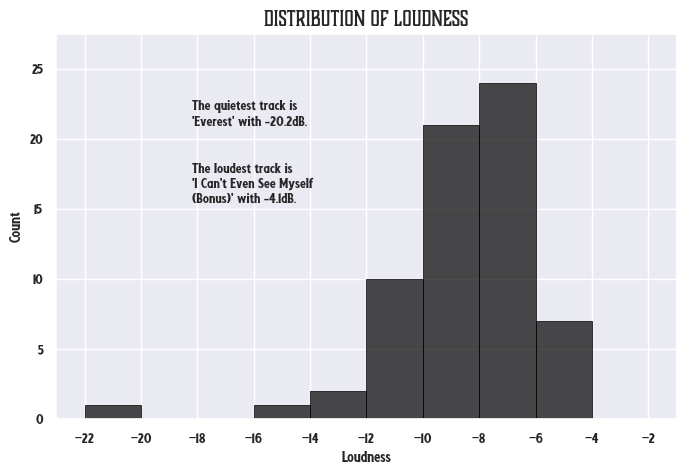

In [21]:
bin_boundaries = np.arange(-22, 0, 2)
plt.figure(figsize=(8,5))
sns.histplot(atw['loudness'], color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Loudness', fontproperties=prop, fontsize=15)
plt.xlabel('Loudness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0,30,5), fontproperties=prop2, fontsize=13) 
plt.ylim(0,27.5)
plt.grid(True)
plt.xticks(np.arange(-22, 0, 2),fontproperties=prop2, fontsize=13)
plt.text(-18.2, 21,f"The quietest track is \n'{atw.loc[atw['loudness'].idxmin(), 'name']}' with {atw['loudness'].min():.1f}dB.", fontproperties=prop2, fontsize=13)
plt.text(-18.2, 15.5,f"The loudest track is \n'I Can't Even See Myself \n(Bonus)' with {atw['loudness'].max():.1f}dB.", fontproperties=prop2, fontsize=13)
plt.show();

Here again "Everest" has the lowest score. That's propably no coincidence. The song "I can't Even See Myself" is rather atypical for the band, much heavier than usual and with screaming vocals. So the high loudness score seems alright.

### Speechiness

Speechiness detects the presence of spoken words in a track. The documentation gives a rough orientation:
- values > 0.66: track probably made entirely of spoken words
- 0.33 > values < 0.66: track may contain both music and speech
- values < 0.33: music and other non-speech-like track

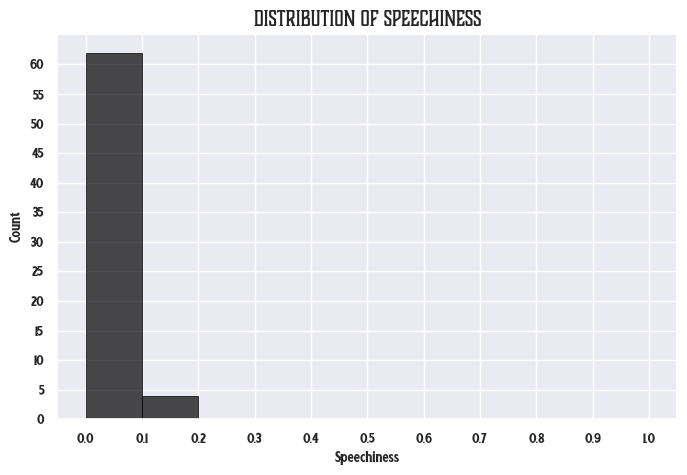

In [22]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['speechiness'], color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Speechiness', fontproperties=prop, fontsize=15)
plt.xlabel('Speechiness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 65, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=13)
plt.show();

All tracks are above any suspicion of containing spoken elements.

### Acousticness

I can't think of an acoustic song by All Them Witches. Let's check if I'm right.

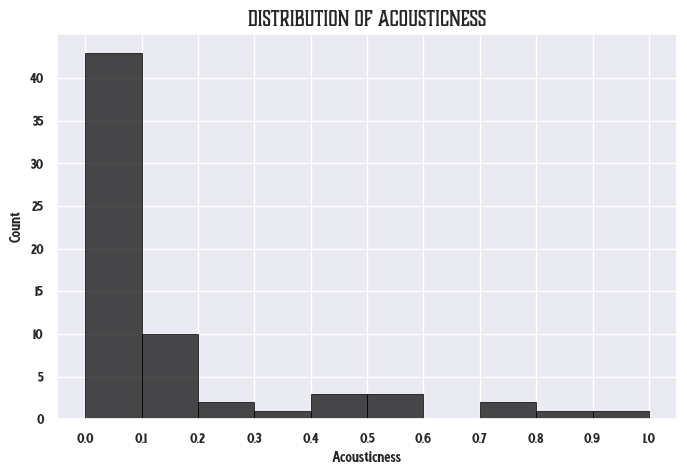

In [23]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['acousticness'], color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Acousticness', fontproperties=prop, fontsize=15)
plt.xlabel('Acousticness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 45, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.show();

Interesting. Let's see which songs have reached higher scores.

In [24]:
acoustic_top_4 = atw.nlargest(4,'acousticness')[['name', 'acousticness']].reset_index(drop=True)
acoustic_top_4

,name,acousticness
0,Everest,0.994
1,Fall Into Place,0.803
2,Mellowing,0.797
3,The Children of Coyote Woman,0.767


"Everest" is a pure guitar instrumental, but in my opinion an electric guitar is used in it, just as in "Fall Into Place". But in fact, "Mellowing" and "The Children of Coyote Woman" are acoustic.

What about

### Instrumentalness

There are a couple of instrumental songs from the band.

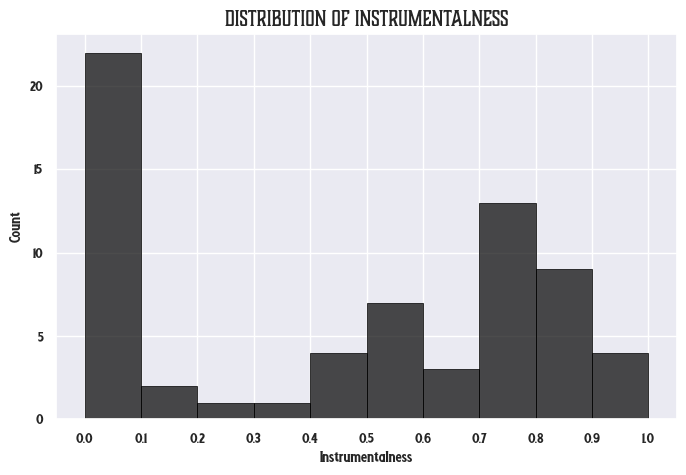

In [25]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['instrumentalness'], color='#000000', edgecolor='#000000', alpha=.7 ,linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Instrumentalness', fontproperties=prop, fontsize=15)
plt.xlabel('Instrumentalness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 25, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.show();

Indeed, quite a lot. But are all of them true instrumentals?

In [26]:
instrumental_top10 = atw.nlargest(10,'instrumentalness')[['name', 'instrumentalness']].reset_index(drop=True)
instrumental_top10

,name,instrumentalness
0,Slow City,0.949
1,Mama Is a Shining Star,0.948
2,Holding Your Breath Across the River,0.911
3,Guns,0.902
4,Tiger's Pit,0.898
5,Rats in Ruin,0.888
6,Instrumental 2 (Welcome To The Caveman Future),0.888
7,Enemy of My Enemy,0.854
8,Until It Unwinds,0.846
9,This Is Where It Falls Apart,0.839


Well, yes, "Slow City" and "Mama is a Shining Star" indeed are instrumentals. But "Holding Your Breath Across the River" is *not*. Interestingly it contains spoken words and no vocals. (So it should definitely have a higher speechiness score...) 

Most of the tracks in this list clearly contain vocals while true instrumentals are missing! So in my eyes, you can't really rely on this value.

Let's check

### Liveness

The scores should be low as I have removed all live albums from this analysis.

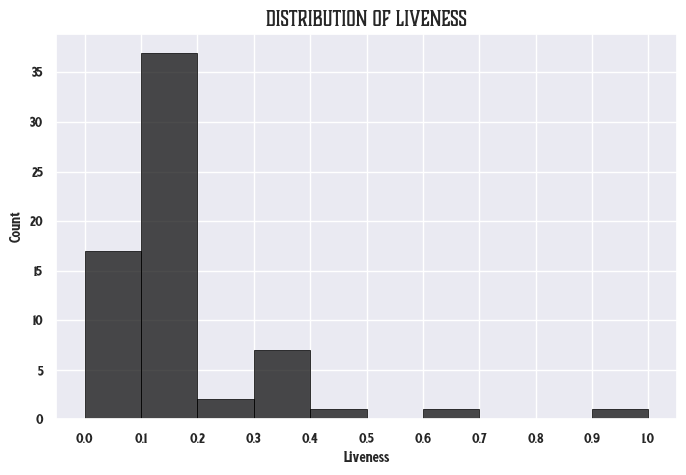

In [27]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['liveness'], color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Liveness', fontproperties=prop, fontsize=15)
plt.xlabel('Liveness', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 40, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1),fontproperties=prop2, fontsize=13)
plt.show();

In [28]:
liveness_top2 = atw.nlargest(2,'liveness')[['name', 'liveness']].reset_index(drop=True)
liveness_top2 

,name,liveness
0,6969 WXL THE CAGE,0.920
1,L'hotel Serein,0.649


I'm pretty sure both tracks were recorded in the studio. Especially "6969 WXL THE CAGE" contains countless gimmicks that were obviously mixed in. So this is another score I don't rely on too much.

Let's have a look at the 

### Valence

I'm interested in the valence value. Remember: It's a value between 0 and 1 while 0 means negative (sad, depressed, angry, etc.) and 1 means positive (happy, cheerful, euphoric, etc.). I assume that the values for this band will be closer to 0...

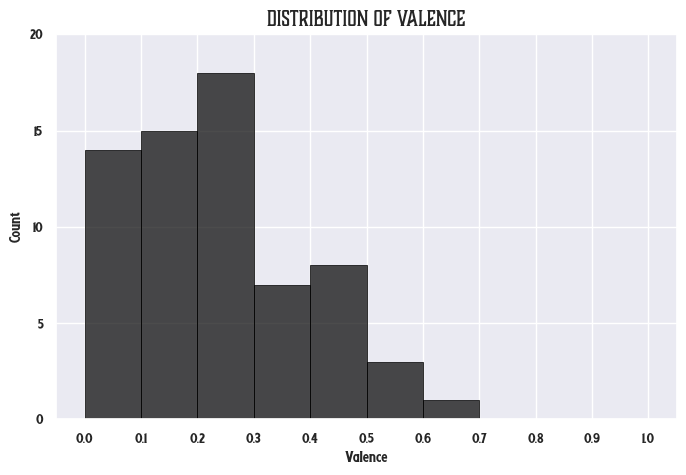

In [29]:
bin_boundaries = np.arange(0, 1.1, 0.1)
plt.figure(figsize=(8,5))
sns.histplot(atw['valence'], color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5, bins=bin_boundaries, stat='count')
plt.title('Distribution of Valence', fontproperties=prop, fontsize=15)
plt.xlabel('Valence', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 21, 5), fontproperties=prop2, fontsize=13) 
plt.grid(True)
plt.xticks(np.arange(0, 1.1, 0.1), fontproperties=prop2, fontsize=13)
plt.show();

In [30]:
valence_top5 = atw.nlargest(5,'valence')[['name', 'valence']].reset_index(drop=True)
valence_top5 

,name,valence
0,Surface-To-Air Whistle,0.611
1,Romany Dagger,0.589
2,The Urn,0.520
3,Alabaster,0.512
4,Half-Tongue,0.494


Indeed, the mood of the songs is rather gloomy. But if "Surface-To-Air Whistle" is the happiest song of them - HOW gloomy are the other ones?

Let's talk about the

### Tempo

This is the speed of a song, in beats per minute (BPM)

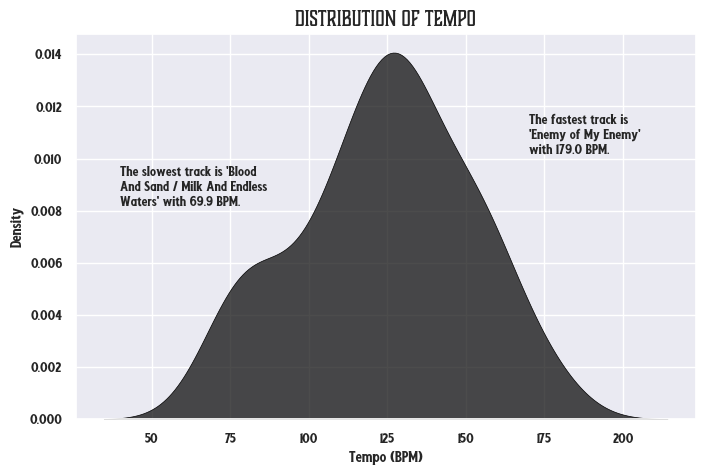

In [31]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=atw['tempo'], fill=True, color= '#000000', alpha=0.7,edgecolor='#000000', linewidth=0.5)
plt.xlabel('Tempo (BPM)', fontproperties=prop2, fontsize=14)
plt.ylabel('Density', fontproperties=prop2, fontsize=14)
plt.title('Distribution of Tempo', fontproperties=prop, fontsize=15)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.text(40, 0.0082, f"The slowest track is 'Blood \nAnd Sand / Milk And Endless \nWaters' with {atw['tempo'].min():.1f} BPM.", fontproperties=prop2, fontsize=13)
plt.text(170, 0.0102,f"The fastest track is \n'{atw.loc[atw['tempo'].idxmax(), 'name']}' \nwith {atw['tempo'].max():.1f} BPM.", fontproperties=prop2, fontsize=13)
plt.show();

We see that most of the songs are around 125 BPM. I think that's a very typical rock tempo, rather brisk. In Italian you would say 'allegro'.

The most energetic song "Enemy of My Enemy" is also the fastest.

Let's now have a look at

### Time Signature

The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

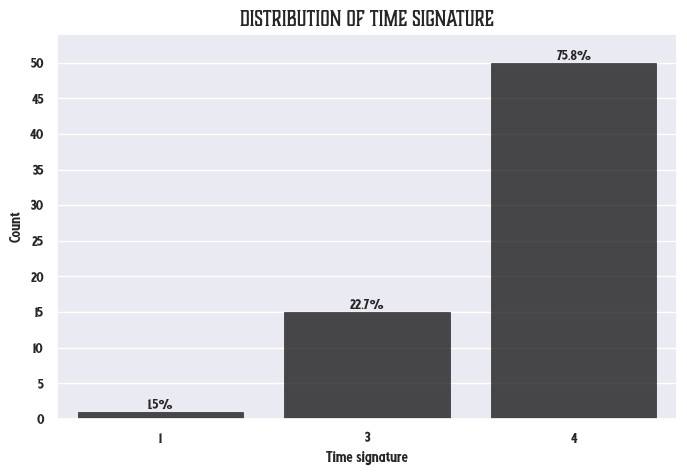

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='time_signature', data=atw, color='#000000', edgecolor='#000000', alpha=.7, linewidth=0.5)
plt.title('Distribution of Time Signature', fontproperties=prop, fontsize=15)
plt.xlabel('Time signature', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 55, 5), fontproperties=prop2, fontsize=13) 
plt.xticks(fontproperties=prop2, fontsize=13) 
plt.ylim(0,54)
plt.grid(True, axis='y') 
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.show();

Ok, by far most tracks are in 3/4 or 4/4. But a couple of questions arise here.

Remember what the documentation said: *The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4"*. This assumes, that all songs are in a x/4 meter, which is not true in the real world. 

Also, I have no idea how to interpret the time signature of 2 in my data set... (It's only one song, called '41')

Let's have a look at the 

### Mode

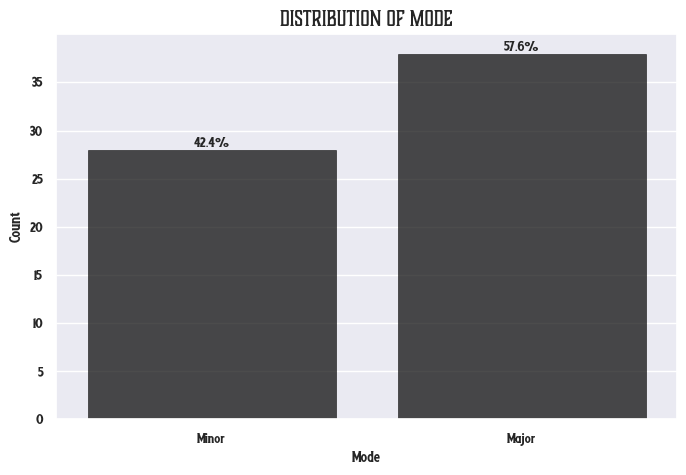

In [33]:
plt.figure(figsize=(8, 5))
sns.countplot(x='mode', data=atw, color='#000000', edgecolor='#000000', alpha=0.7,linewidth=0.5)
plt.title('Distribution of Mode', fontproperties=prop, fontsize=15)
plt.xlabel('Mode', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 40, 5), fontproperties=prop2, fontsize=13) 
plt.ylim(0,40)
plt.xticks([0, 1], ['Minor', 'Major'], fontproperties=prop2, fontsize=13)
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.grid(True, axis='y') 
plt.show();

Most songs are in Major.

What about the

### Key

The key the track is in. [Pitchclass notation](https://en.wikipedia.org/wiki/Pitch_class) is being used here. For the plot I'll convert the numbers from 0-11 to their tonal counterparts.

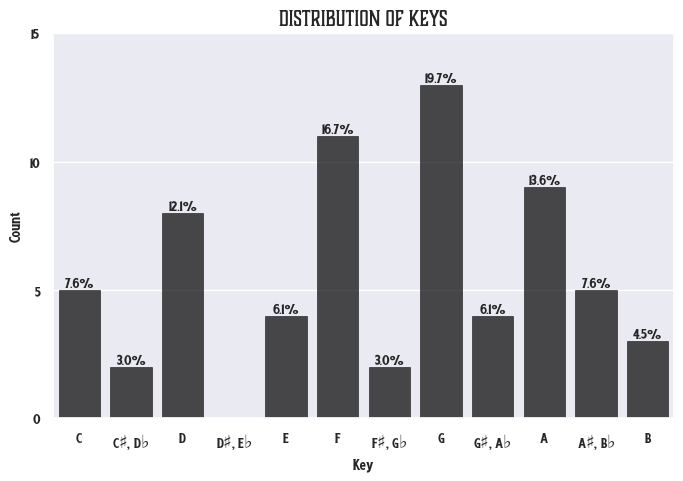

In [34]:
occurrences = atw['key'].value_counts().reindex(range(12), fill_value=0)

order = range(12)
labels = ['C', r'C$\sharp$, D$\flat$', 'D', r'D$\sharp$, E$\flat$', 'E', 'F', r'F$\sharp$, G$\flat$', 'G', r'G$\sharp$, A$\flat$', 'A', r'A$\sharp$, B$\flat$','B']
plt.figure(figsize=(8, 5))
sns.countplot(x='key', data=atw, order=order, color='#000000', edgecolor='#000000', alpha=0.7,linewidth=0.5)
plt.title('Distribution of Keys', fontproperties=prop, fontsize=15)
plt.xlabel('Key', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.xticks(order, labels, fontproperties=prop2, fontsize=13)
plt.yticks(np.arange(0, 20, 5), fontproperties=prop2, fontsize=13) 
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.show()

Most tracks are in G, followed by F.

***Note to myself:** I may want to also visualize the combination of mode and key, as given in the following table.*

In [35]:
combinations_counts = atw.groupby(['mode', 'key']).size().reset_index(name='count')
combinations_counts.head()

,mode,key,count
0,0,0,1
1,0,2,2
2,0,4,3
3,0,5,4
4,0,6,1


Last variable I want to look at is separately whether or not All Them Witches tracks have explicit lyrics:

### Explicitness

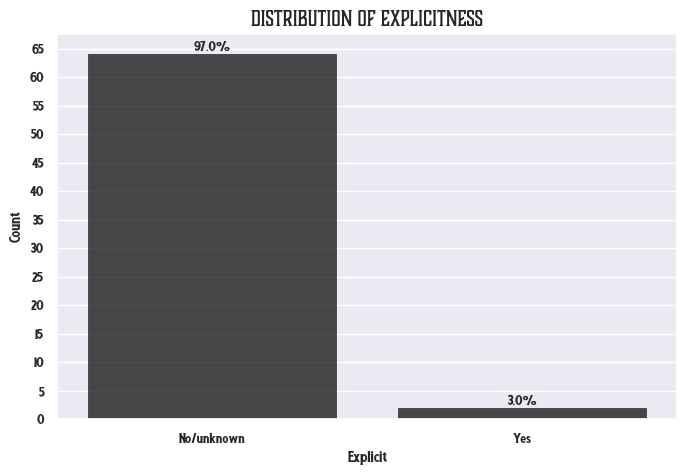

In [36]:
plt.figure(figsize=(8, 5))
sns.countplot(x='explicit', data=atw, color='#000000', edgecolor='#000000', alpha=0.7,linewidth=0.5)
plt.title('Distribution of Explicitness', fontproperties=prop, fontsize=15)
plt.xlabel('Explicit', fontproperties=prop2, fontsize=14)
plt.ylabel('Count', fontproperties=prop2, fontsize=14)
plt.yticks(np.arange(0, 70, 5), fontproperties=prop2, fontsize=13) 
plt.ylim(0,67.5)
plt.xticks(ticks=[0, 1], labels=['No/unknown', 'Yes'],fontproperties=prop2, fontsize=13)
total = float(len(atw))
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontproperties=prop2, fontsize=13)
plt.grid(True, axis='y') 
plt.show();

By far most tracks are not labelled as explicit.

## Relationships

A correlation heatmap is always a good start when diving into relationships.

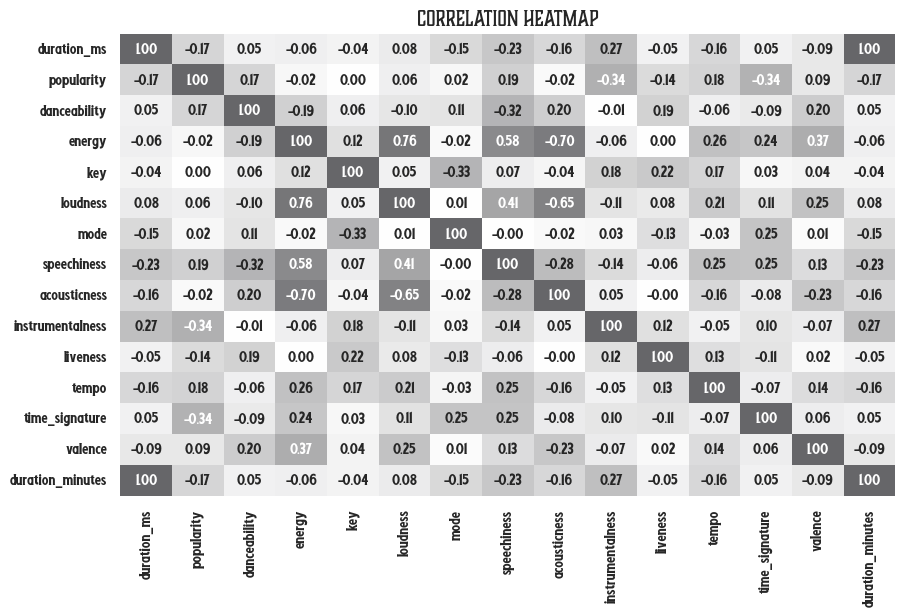

In [37]:
from matplotlib.colors import LinearSegmentedColormap

numerical_columns = atw.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_columns.corr()

colors = [(0, '#00000090'), (0.5, 'white'), (1, '#00000090')]
cmap = LinearSegmentedColormap.from_list('custom', colors)

plt.figure(figsize=(10,6))
plt.title('Correlation Heatmap', fontproperties=prop, fontsize=15)
sns.heatmap(correlation_matrix, annot=True, cmap=cmap, center=0, fmt=".2f", vmin=-1, cbar=False,vmax=1, annot_kws={"fontproperties": prop2, "fontsize": 14})
plt.xticks(fontproperties=prop2, fontsize=14)
plt.yticks(fontproperties=prop2, fontsize=14)
plt.grid(False) 
plt.show()

How can these numbers be interpreted?


    
| Size of Correlation| Interpretation|
|---|---|
|0.90 to 1.00 (−0.90 to −1.00) |Very high positive (negative) correlation |
|0.70 to 0.90 (−0.70 to −0.90) |High positive (negative) correlation      |
|0.50 to 0.70 (−0.50 to −0.70) |Moderate positive (negative) correlation  |
|0.30 to 0.50 (−0.30 to −0.50) |Low positive (negative) correlation       |
|0.00 to 0.30 (0.00 to −0.30)  |Negligible correlation                    |

Let's have a look at only those correlations that are below -0.3 and above 0.3 and exclude the perfect correlations that each variable has with itself.

In [38]:
# create a dataset with combinations of variables that have a higher correlation coefficent than |0.3| and sort by absolute correlation coefficient
filtered_correlations = correlation_matrix[((correlation_matrix > 0.3) & (correlation_matrix < 1.0)) | ((correlation_matrix < -0.3) & (correlation_matrix > -1.0))]
filtered_correlations_df = filtered_correlations.unstack().reset_index()
filtered_correlations_df.columns = ['Variable 1', 'Variable 2', 'Correlation']
filtered_correlations_df = filtered_correlations_df.dropna()
filtered_correlations_df = filtered_correlations_df.drop_duplicates(subset=['Correlation'])
filtered_correlations_df['Variables'] = filtered_correlations_df['Variable 1'] + ' - ' + filtered_correlations_df['Variable 2']
filtered_correlations_df = filtered_correlations_df.drop(columns=['Variable 1', 'Variable 2'])
filtered_correlations_df = filtered_correlations_df[['Variables', 'Correlation']]
filtered_correlations_df['Absolute Correlation'] = abs(filtered_correlations_df['Correlation'])
filtered_correlations_df = filtered_correlations_df.sort_values(by='Absolute Correlation', ascending=True)
filtered_correlations_df = filtered_correlations_df.drop(columns='Absolute Correlation')
filtered_correlations_df.set_index('Variables', inplace=True)

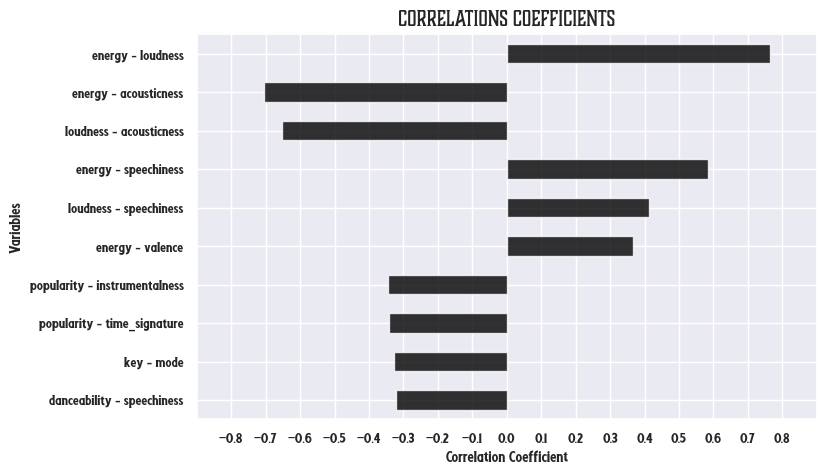

In [39]:
# plot this
ax = filtered_correlations_df.plot(kind='barh', color='000000', alpha=0.8, legend=False, figsize=(8, 5))
plt.xlabel('Correlation Coefficient', fontproperties=prop2, fontsize=14)
plt.ylabel('Variables', fontproperties=prop2, fontsize=14)
plt.title('Correlations Coefficients', fontproperties=prop, fontsize=15)
plt.xlim(-0.9,0.9)
plt.xticks(np.arange(-0.8, 0.9, 0.1), fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
thresholds = [-0.7, -0.5, -0.3, 0.3, 0.5, 0.7]
plt.show();

We do see:
- a high positive correlation between energy and loudness (the more energetic the louder, or the other way around, correlation doesn't describe causality)
- a high negative correlation between energy and acousticness (the more energetic the less likly acoustic, or the other way around)
- a moderate negativee correlation between loudness and acousticness
- a moderate positive correlation between energy and speechiness
- Low correlations between the other variable combinations in this plot

Remember, this plot does not include all these low correlations (between -0.3 and 0.3) that we saw in the heatmap.

The relationships between energy, loudness and acousticness are little surprising.

Interesting to me are the two pairs that include popularity: We can cautiously deduce from this that pure instrumentals are unlikely to be very popular. And that 3/4 time signature is more popular than 4/4 time signature.

Another way to show relationships between numeric variables are scatterplots.

Let's start with

## Scatterplots for interesting correlations

We learned there are 2 pairs of variables which show a high correlation. Let's plot these first.

Please note:
**Github cannot display interactive elements. Please use [nbviewer](https://nbviewer.org/github/scheinmensch/Spotify/blob/main/AllThemWitches.ipynb?flush_cache=False) to view the following plots.**

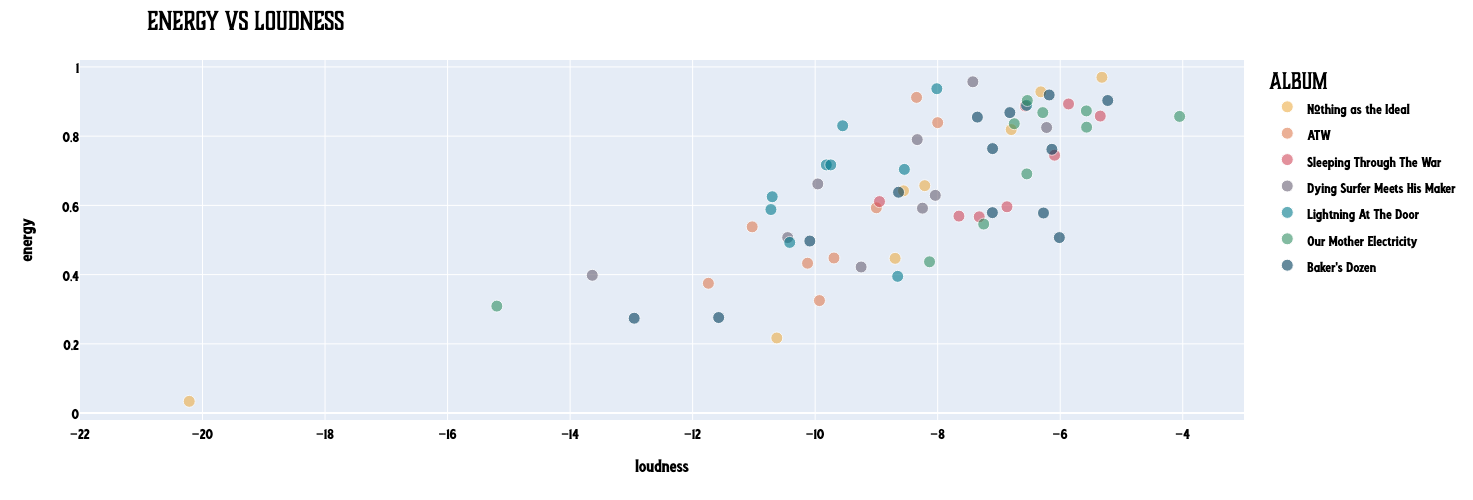

In [40]:
fig = px.scatter(atw, x='loudness', y='energy', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Energy vs Loudness",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[-0.02, 1.02])
fig.update_xaxes(range=[-22, -3])
fig.show()

In this plot we can see the relationship between loudness and energy quite well. The energy score increases as the loudness increases.

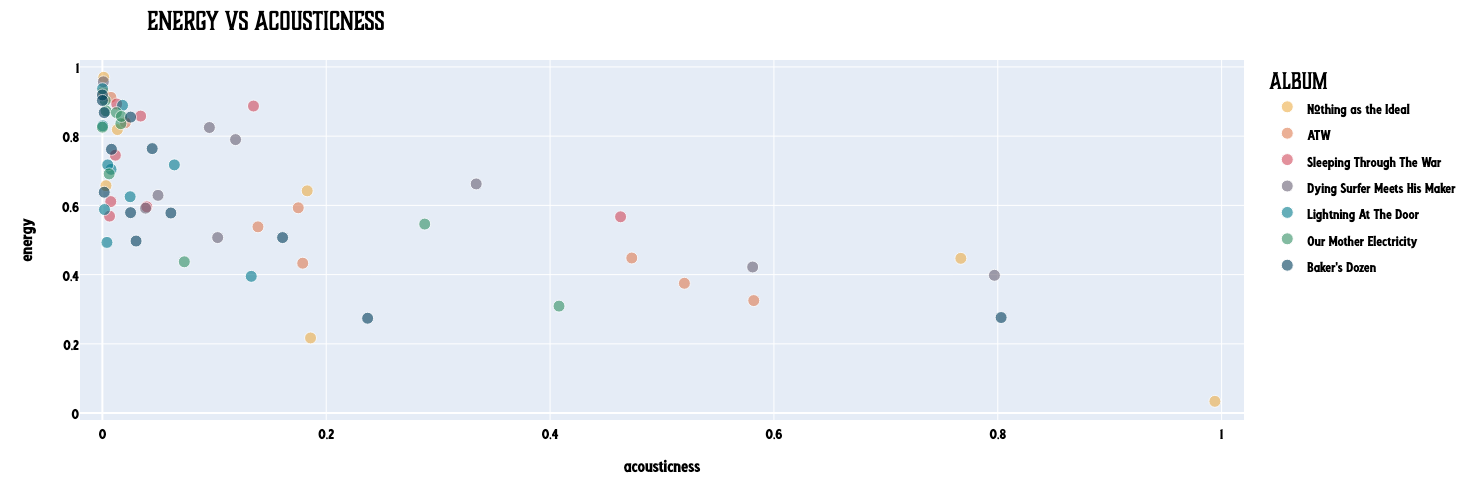

In [41]:
fig = px.scatter(atw, x='acousticness', y='energy', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Energy vs Acousticness",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[-0.02, 1.02])
fig.update_xaxes(range=[-0.02, 1.02])
fig.show()

We see the cluster of tracks with the acousticness scores close to zero. Their energy scores are rarely less than 0.5. However, with higher acousticness score, the energy score decreases.

Further, a low negative correlation between instrumentalness and popularity has been suggested. (Instrumental songs are less popular). Let's have a look:

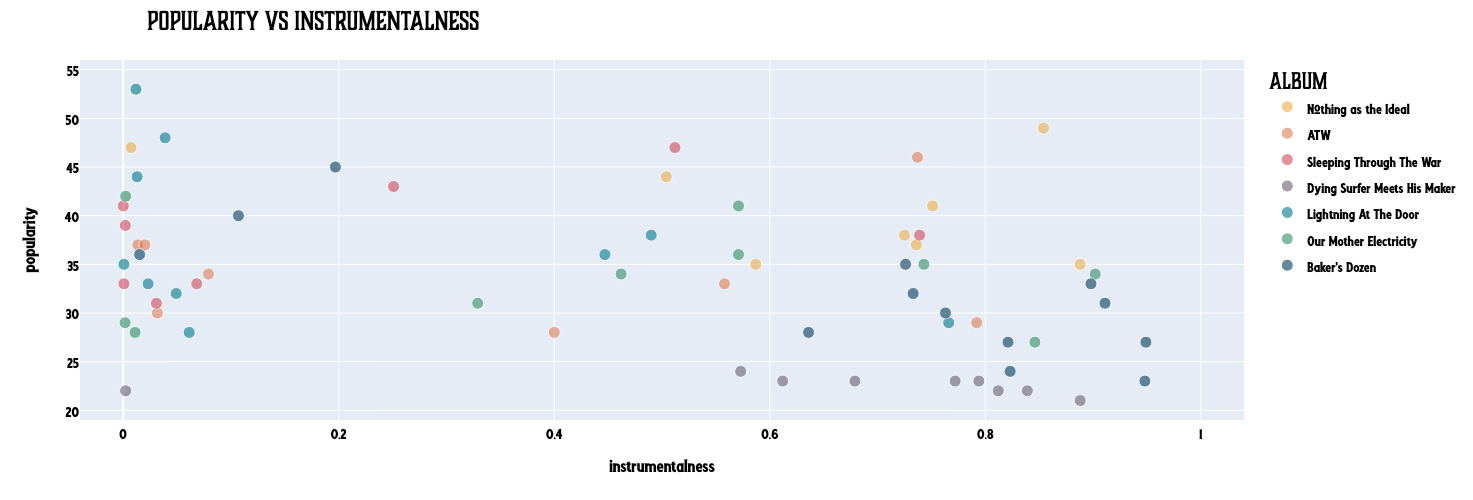

In [42]:
fig = px.scatter(atw, x='instrumentalness', y='popularity', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Popularity vs Instrumentalness",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[19,56])
fig.update_xaxes(range=[-0.04, 1.04])
fig.show()

Hmm, well. For "Baker's Dozen" tracks it seems to be true, at least.

I'd like to know whether long tracks are less popular even though the correlation heatmap suggested only a negligible negative correlation of -0.17.

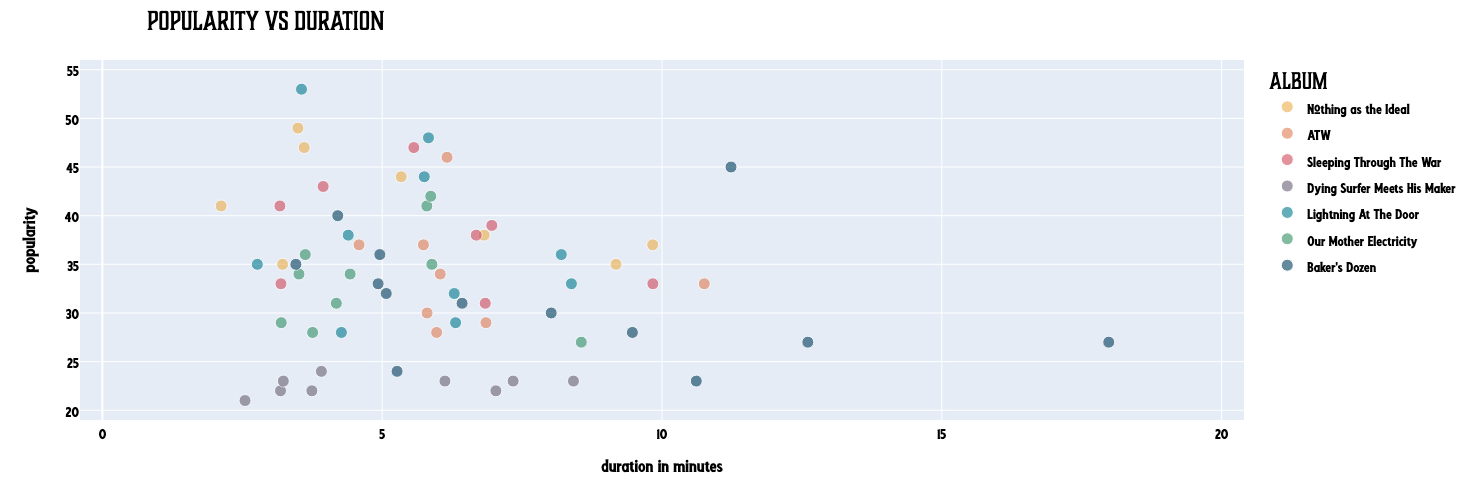

In [43]:
fig = px.scatter(atw, x='duration_minutes', y='popularity', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Popularity vs Duration",
    legend_title="Album",
    title_x=0.1, 
    xaxis_title="duration in minutes",
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[19,56])
fig.update_xaxes(range=[-0.4,20.4])
fig.show()

Here we can see again that "Dying Surfer Meets His Maker" is in general unpopular, no matter how long the tracks are. For some albums (e.g. "Nothing as the Ideal" and "Baker's Dozen") we can see that, in general, the popularity decreases with increasing duration.

I'd also like to visualize Energy/Tempo:

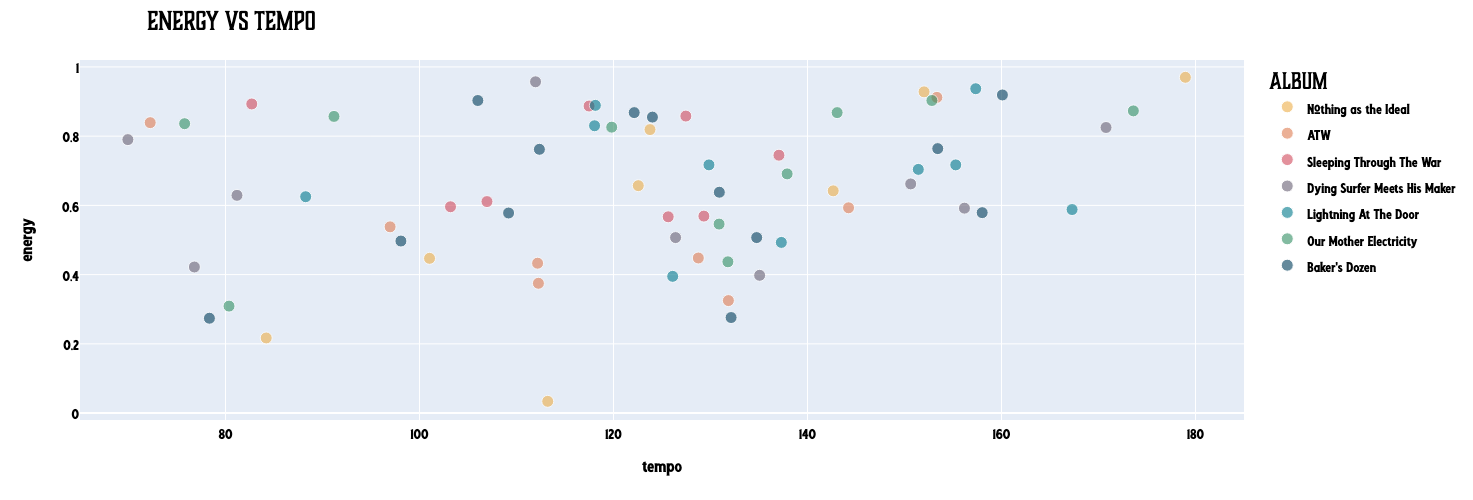

In [44]:
fig = px.scatter(atw, x='tempo', y='energy', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Energy vs tempo",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[-0.02,1.02])
fig.update_xaxes(range=[65,185])
fig.show()

The (my) intuitive idea that the energy increases with increasing tempo seems to be true only for "Nothing as the Ideal".

### Radar chart

I want to create a radar chart to show the mean values of all of those variables which are between 0 and 1. I use plotly for this. 

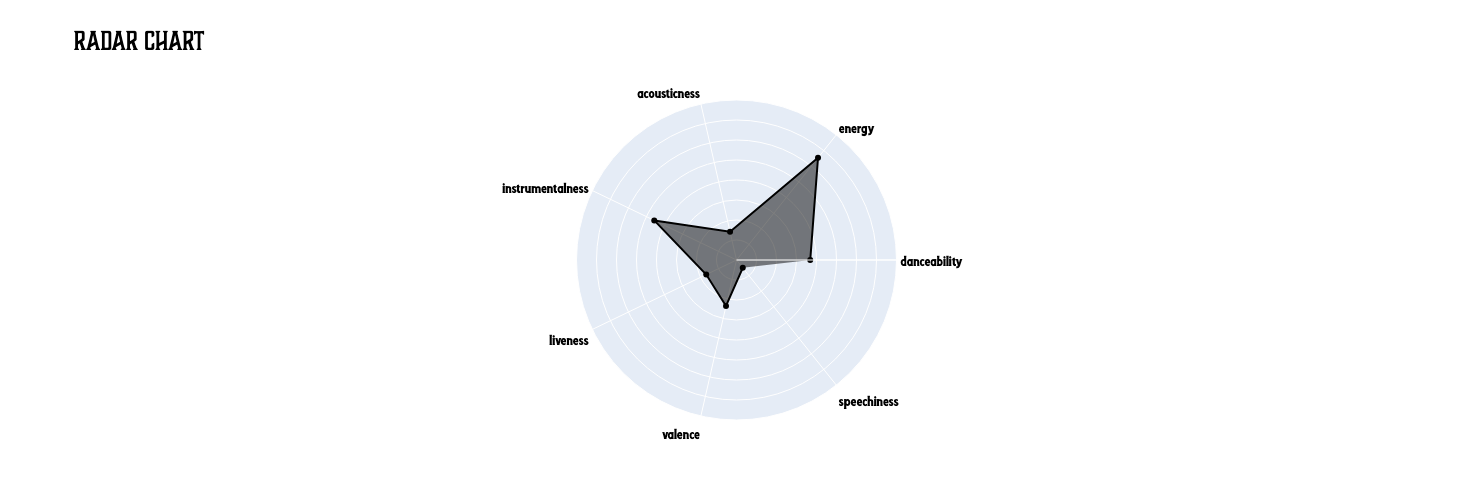

In [45]:
mean_scores = atw[['danceability', 'energy', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'speechiness']].mean()
mean_df = pd.DataFrame(mean_scores).reset_index()
mean_df.columns = ['score', 'median']

fig = go.Figure(data=go.Scatterpolar(
    r=mean_df['median'],
    theta=mean_df['score'],
    fill='toself',
    hovertemplate='%{theta}<br>mean: %{r:.2f}'))

fig.update_layout(
    title="Radar Chart",
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block",
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 0.8],
            tickvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
            showticklabels=False)))

fig.update_traces(line=dict(color='black'), hoverlabel=dict(namelength=0))

fig.show()

### Cluster Analysis

Cluster analysis is a method used to group similar objects or data points together based on their characteristics or attributes. It helps identify patterns or relationships within the data by partitioning it into distinct clusters.

The KMeans algorithm, which I use here, iteratively assigns each data point to the nearest cluster centroid and updates the centroids to minimize the total within-cluster variation. 

In [46]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

columns_for_clustering = ['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'tempo',
       'time_signature', 'valence', 'duration_minutes']
data_for_clustering = atw[columns_for_clustering]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

Next plot, quick and dirty, to determine the best number of clusters. I use the elbow method here.

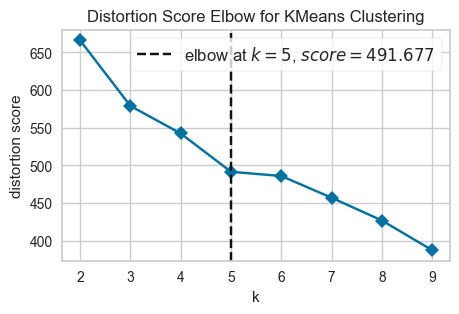

In [47]:
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10), size=(500, 300), timings=False)
 
visualizer.fit(scaled_data)
visualizer.show();

The best number of clusters is 5.

In [71]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

atw['cluster'] = clusters

Now let's take a look at the individual clusters.

In [49]:
final_clusters = atw.groupby('cluster').agg(
    {'duration_minutes': 'mean',
     'popularity': 'mean',
     'danceability': 'mean',
     'energy': 'mean',
     'speechiness': 'mean',
     'acousticness': 'mean',
     'instrumentalness': 'mean',
     'liveness': 'mean',
     'valence': 'mean',
     'loudness': 'mean',
     'tempo': 'mean',
     'key': lambda x: x.value_counts().index[0],
     'mode': lambda x: x.value_counts().index[0],
     'time_signature': lambda x: x.value_counts().index[0],
     'cluster': 'size' 
    }
).rename(columns={'cluster': 'count'}).reset_index()

final_clusters = final_clusters.round(2)
final_clusters

,cluster,duration_minutes,popularity,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence,loudness,tempo,key,mode,time_signature,count
0,0,4.00,34.12,0.47,0.32,0.03,0.68,0.46,0.17,0.18,-12.53,110.34,7,1,4,8
1,1,5.35,33.60,0.36,0.82,0.06,0.02,0.40,0.14,0.45,-6.65,134.62,0,1,4,10
2,2,4.63,33.50,0.30,0.89,0.08,0.02,0.43,0.18,0.25,-6.62,130.02,9,0,4,14
3,3,6.25,37.81,0.42,0.57,0.04,0.13,0.22,0.18,0.22,-8.53,131.63,5,0,3,16
4,4,8.10,30.50,0.34,0.60,0.04,0.08,0.72,0.16,0.15,-8.83,112.74,7,1,4,18


I'm not sure whether 5 clusters isn't a bit too much. However, a few of the clusters are quite plausible, at least in part:

**Cluster 0**: Quiet, rather acoustic pieces with low energy, tempo and valence. However, I am surprised that this cluster of all clusters should have the highest danceability score.

**Clusters 1 and 2**: The two clusters hardly differ in their essential characteristics (danceability, energy, acousticness, instrumentalness, loudness, tempo). They are all rather powerful, rocky songs. However, the songs in cluster 1 are generally more cheerful (higher valence, in major), while the songs in cluster 2 tend to be darker (low valence, in minor).

**Cluster 3**: This cluster is similar to cluster 2, but is less energetic.

**Cluster 4**: This cluster is similar to cluster 0, but is more energetic and much less acoustic.

It is important to understand that the individual clusters are not as homogeneous as they appear. In this case, clusters are more of a nice gimmick that can stimulate further thought, but do not represent a musicological classification of the pieces of music.

Let's also plot some features of the clusters in a radar plot:

In [50]:
atw_cluster_analysis = atw[['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence', 'cluster']].copy()
means = atw_cluster_analysis.groupby('cluster').mean().round(2).reset_index()
categories = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'valence']

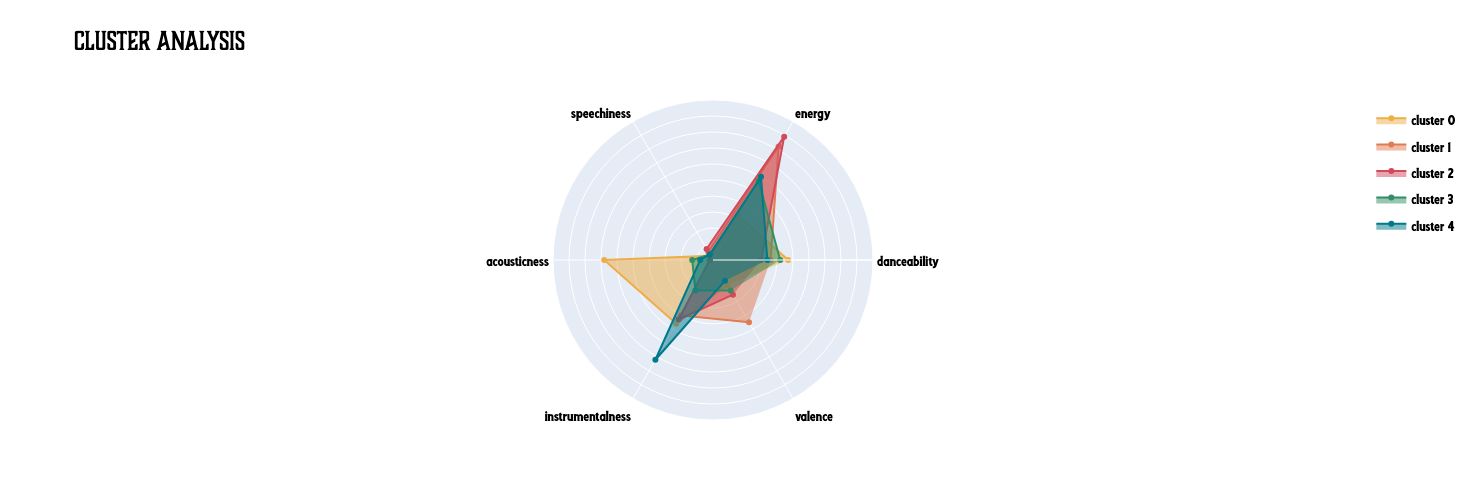

In [51]:
cluster_colors = ["#edae49", "#df7c52", "#d1495b", "#318F63", "#00798c"]

fig = go.Figure()

for i in range(len(means)):
    fig.add_trace(go.Scatterpolar(
        r=means.iloc[i][categories],
        theta=categories,
        fill='toself',
        name=f'cluster {means.iloc[i]["cluster"]:.0f}',
        line_color=cluster_colors[i],
        hovertemplate='%{theta}<br>mean: %{r:.2f}'
    ))

fig.update_layout(
    width=800,
    height=500,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1],
            tickvals=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,0.8,0.9],
            showticklabels=False
        )),
    showlegend=True,
    title="Cluster analysis",
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block",
)
fig.update_traces(hoverlabel=dict(namelength=0))
fig.show()

## Next things I want to do:

- Can I find out, what popular songs have in common?
- Plot some of the scores agains time_signature, key and mode, tempo
- Has music changed over time?
- Parallel Coordinates Plot for clusters

-----------
*In the following collection you find more - static and interactive - scatterplots which I have created, but in my opinion they don't show interesting insights*

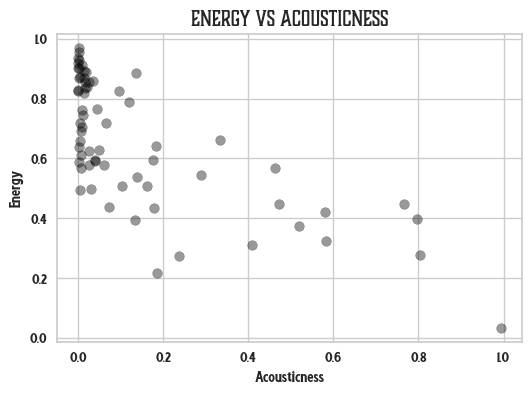

In [52]:
plt.figure(figsize=(6, 4))
plt.scatter(atw['acousticness'], atw['energy'], color= '#000000', alpha=0.4)
plt.title('Energy vs Acousticness', fontproperties=prop, fontsize=15)
plt.xlabel('Acousticness', fontproperties=prop2, fontsize=14)
plt.ylabel('Energy', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.grid(True)
plt.show()

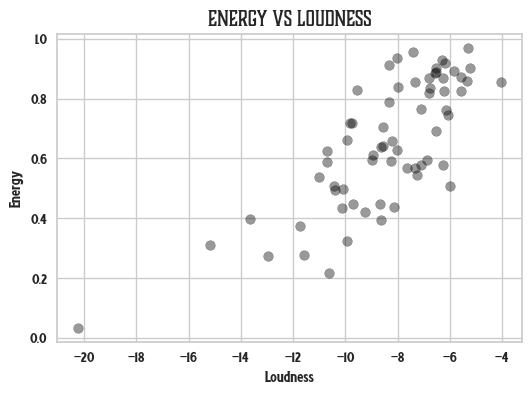

In [53]:
plt.figure(figsize=(6, 4))
plt.scatter(atw['loudness'], atw['energy'], color= '#000000', alpha=0.4)
plt.title('Energy vs Loudness', fontproperties=prop, fontsize=15)
plt.xlabel('Loudness', fontproperties=prop2, fontsize=14)
plt.ylabel('Energy', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.grid(True)
plt.show()

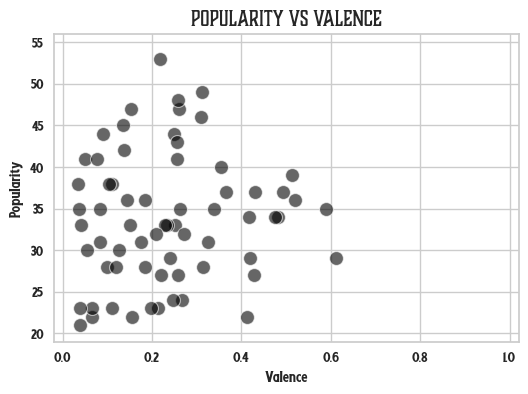

In [54]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='valence', y='popularity', color='#000000', alpha=0.6, s=100)
plt.title('Popularity vs Valence', fontproperties=prop, fontsize=15)
plt.xlabel('Valence', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xlim(-0.02,1.02)
plt.ylim(19,56)
plt.grid(True)
plt.show()

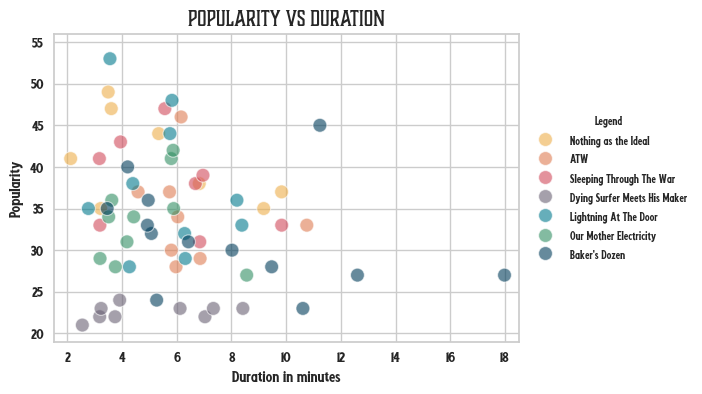

In [55]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='duration_minutes', y='popularity', hue='album_name', palette=cpal, alpha=0.6, s=100)
plt.title('Popularity vs Duration', fontproperties=prop, fontsize=15)
plt.xlabel('Duration in minutes', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xlim(1.5,18.5)
plt.ylim(19,56)
legend = plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5), prop=prop2, fontsize=13)
legend.get_title().set_fontproperties(prop2)
plt.grid(True)
plt.show()

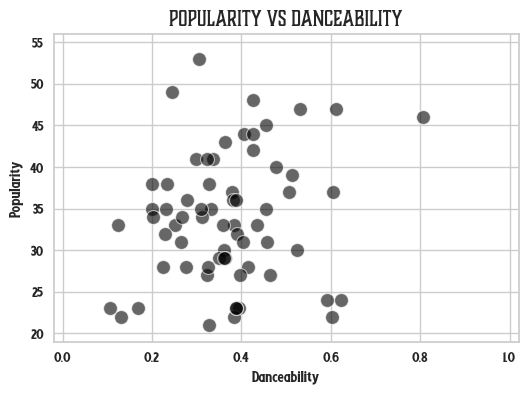

In [56]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='danceability', y='popularity', color='#000000', alpha=0.6, s=100)
plt.title('Popularity vs Danceability', fontproperties=prop, fontsize=15)
plt.xlabel('Danceability', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xlim(-0.02,1.02)
plt.ylim(19,56)
plt.grid(True)
plt.show()

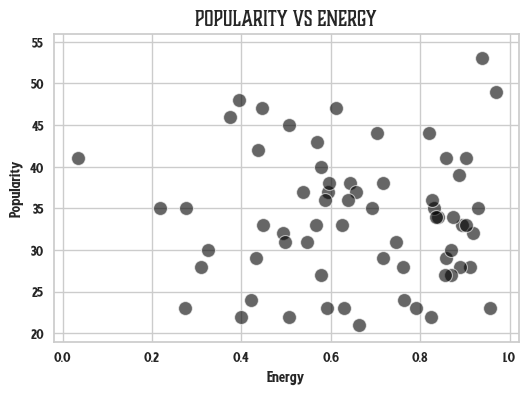

In [57]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='energy', y='popularity', color='#000000', alpha=0.6, s=100)
plt.title('Popularity vs Energy', fontproperties=prop, fontsize=15)
plt.xlabel('Energy', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xlim(-0.02,1.02)
plt.ylim(19,56)
plt.grid(True)
plt.show()

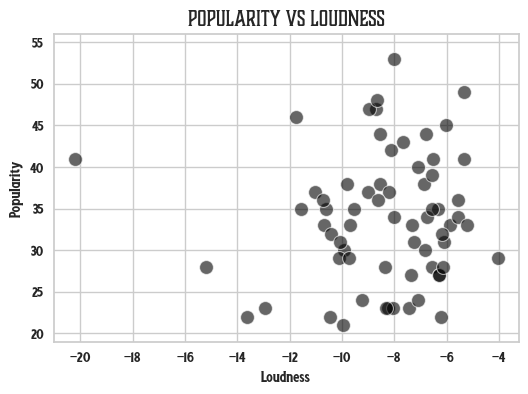

In [58]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='loudness', y='popularity', color='#000000', alpha=0.6, s=100)
plt.title('Popularity vs Loudness', fontproperties=prop, fontsize=15)
plt.xlabel('Loudness', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.ylim(19,56)
plt.grid(True)
plt.show()

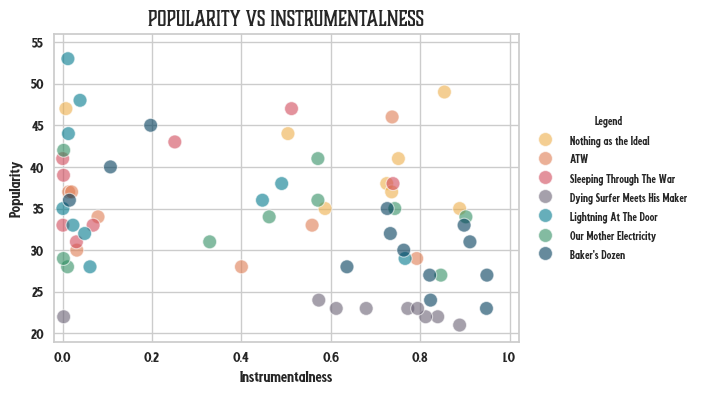

In [59]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='instrumentalness', y='popularity', hue='album_name', palette=cpal, alpha=0.6, s=100)
plt.title('Popularity vs Instrumentalness', fontproperties=prop, fontsize=15)
plt.xlabel('Instrumentalness', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.xlim(-0.02,1.02)
plt.ylim(19,56)
plt.yticks(fontproperties=prop2, fontsize=13)
legend = plt.legend(title='Legend', loc='center left', bbox_to_anchor=(1, 0.5), prop=prop2, fontsize=13)
legend.get_title().set_fontproperties(prop2)
plt.grid(True)
plt.show()

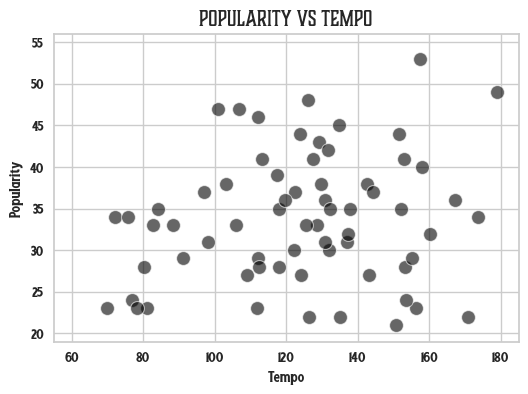

In [60]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=atw, x='tempo', y='popularity', color='#000000', alpha=0.6, s=100)
plt.title('Popularity vs Tempo', fontproperties=prop, fontsize=15)
plt.xlabel('Tempo', fontproperties=prop2, fontsize=14)
plt.ylabel('Popularity', fontproperties=prop2, fontsize=14)
plt.xticks(fontproperties=prop2, fontsize=13)
plt.yticks(fontproperties=prop2, fontsize=13)
plt.xlim(55,185)
plt.ylim(19,56)
plt.grid(True)
plt.show()

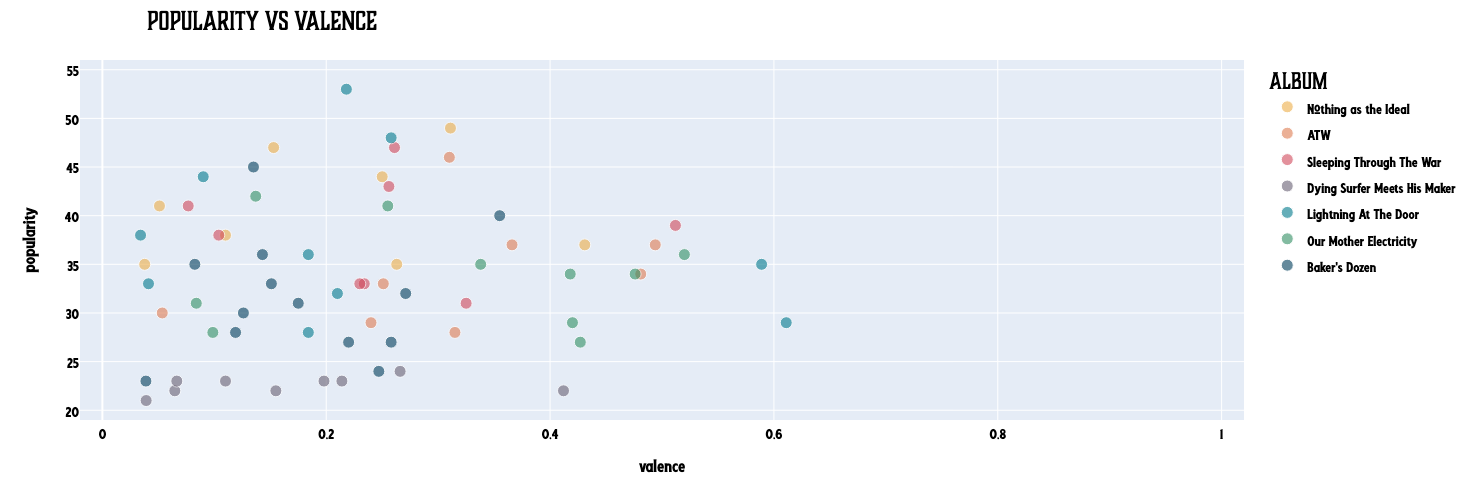

In [61]:
fig = px.scatter(atw, x='valence', y='popularity', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Popularity vs Valence",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[19,56])
fig.update_xaxes(range=[-0.02,1.02])
fig.show()

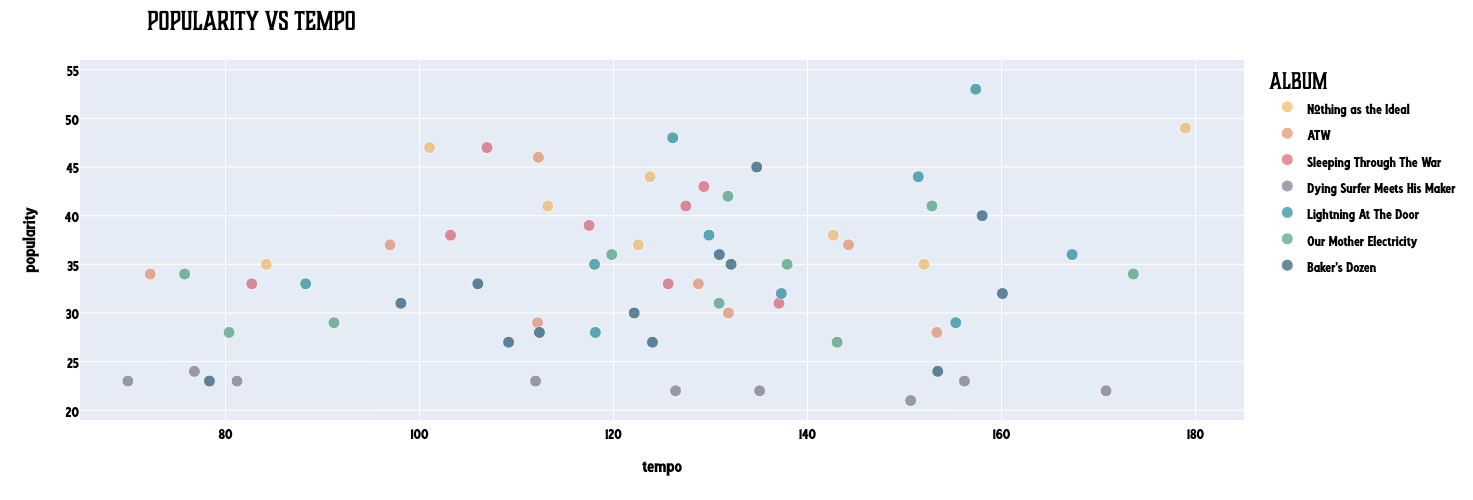

In [62]:
fig = px.scatter(atw, x='tempo', y='popularity', color='album_name', custom_data=['name'], color_discrete_map=cpal_px, opacity=0.6)

fig.update_traces(marker=dict(size=12,
                              line=dict(width=1,
                                        color='white')),
                  selector=dict(mode='markers'))
fig.update_traces(hovertemplate='%{customdata[0]}')
fig.update_layout(
    title="Popularity vs Tempo",
    legend_title="Album",
    title_x=0.1, 
    width=800,
    height=500,
    font_family="ROCKABILLY",
    font_color="black",
    font_size=18,
    title_font_family="Boucherie Block",
    legend_title_font_family="Boucherie Block")
fig.update_yaxes(range=[19,56])
fig.update_xaxes(range=[65,185])
fig.show()